In [13]:
from igraph import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
origg = Graph()
g=Graph()

In [4]:
community=pd.read_csv("/Users/sasankauppu/Desktop/Data Mining CS6220/DataMining/Flickr_sampled_edges/community_membership_2K.csv",header=None)
edges=np.asarray(pd.read_csv("/Users/sasankauppu/Desktop/Data Mining CS6220/DataMining/Flickr_sampled_edges/edges_sampled_map_2K.csv",header=None))

In [5]:
g.add_vertices(max(community[0])+1)
origg.add_vertices(max(community[0])+1)
for i in edges:
    g.add_edges([(i[0],i[1])])
    origg.add_edges([(i[0],i[1])])

In [6]:
def edge_betweenness(g1):
    spaths=[]
    for i in range(g1.vcount()):
        for j in range(i+1,g1.vcount()):
            spaths.append(g1.get_all_shortest_paths(i,j))
    
    betweenness=[]
    for i in g1.get_edgelist():
        el1=i[0]
        el2=i[1]

        bscore=0.0
        for j in spaths:
            bcount=0
            if j!=[]:
                for k in j:
                    if el1 in k and el2 in k:
                        bcount+=1.0
                bscore+=bcount/len(j)
        betweenness.append(bscore)
        
    return betweenness

In [7]:
def calc_modularity(g1,g2):
    mod=0.0
    clusters=g2.clusters()
    edgecount = len(g1.get_edgelist())
    
    for i in range(g1.vcount()):
        for j in range(i+1,g1.vcount()):
            fl=0
            for k in clusters:
                if i in k and j in k:
                    fl=1
                    break
            
            if fl==1:
                if g1.get_eid(i,j,error=False)!=-1:
                    mod+=1
                mod-=((g1.degree(i)*g1.degree(j))/(2.0*edgecount))
    
    mod = mod/(2.0*edgecount)
    return mod

In [10]:
cmod=[]
for i in range(400):
    bet = edge_betweenness(g)
    deledges=[]
    for j in np.argsort(bet)[::-1][:5]:
        deledges.append(g.get_edgelist()[j])
    g.delete_edges(deledges)
    
    cm=calc_modularity(origg,g)
    cmod.append(cm)

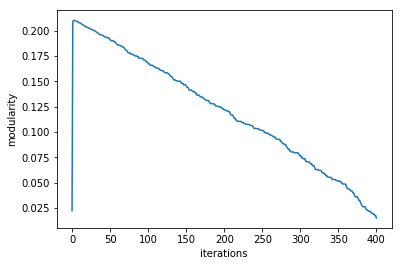

In [17]:
plt.plot(range(401), [calc_modularity(origg,origg)]+cmod)
plt.title("")
plt.ylabel("modularity")
plt.xlabel("iterations")
plt.show()

In [56]:
'''g1=Graph()
g1.add_vertices(6)
g1.add_edges([(0,1),(1,4),(0,4),(1,2),(2,3),(3,4),(3,5)])

g2=Graph()
g2.add_vertices(6)
g2.add_edges([(0,1),(1,4),(0,4),(1,2),(2,3),(3,4),(3,5)])'''